In [61]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot
from train import Results

In [149]:
exp='lenk'
if exp=='exp1':
    folder = 'exps/exp1/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'fista\', \'subgd\', \'ssubgd\']ist[\'fista\', \'subgd\', \'ssubgd\']n10val_perc0.0-2019-01-31 13:23:14.322002'
    T=500
    x_right=500
elif exp =='lenk':
    folder = 'exps/lenk/grid_searchexpLenkRegn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'subgd\', \'fista\']ist[\'ssubgd\', \'fista\', \'subgd\']n16val_perc0.0-2019-01-31 13:24:47.858052'
    T=100
    x_right=100

title=exp
metric='loss'
y_label='Test Error'
save=True
save_dir = 'plotsf'

if not save:
    save_dir=None

files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None
result_dict = {}
def put_in_dict(starts_with, name, color=None):
    metrics = {'loss': get_file(starts_with=starts_with)}
    r = Results(None, False, False, name=name)
    r.add_metrics(metrics)
    r.color = color
    result_dict[name] = r

In [150]:
put_in_dict('ITL-tsfista', 'ITL ERM', 'black')
put_in_dict('ITL-tsssubgd', 'ITL SGD', 'darkred')

put_in_dict('LTL-trssubgdtsssubgd', 'LTL SGD-SGD', 'c')
put_in_dict('LTL-trfistatsssubgd', 'LTL ERM-SGD', 'b')
put_in_dict('LTL-trssubgdtsfista', 'LTL SGD-ERM', 'm')
put_in_dict('LTL-trfistatsfista', 'LTL ERM-ERM', 'red')

if exp != 'lenk':
    put_in_dict('MEAN-tsfista', 'MEAN ERM', 'green')
    put_in_dict('MEAN-tsssubgd', 'MEAN SGD', 'orange')

----------loss-ITL ERM-loss mean std 1.528758463541667 0.05875356138721183
----------loss-ITL SGD-loss mean std 3.7123962963702444 0.1766797851558022
----------loss-LTL SGD-SGD-loss mean std 1.8082925836262922 0.06974087719702153
----------loss-LTL ERM-SGD-loss mean std 2.0395311946110177 0.08140408175163218
----------loss-LTL SGD-ERM-loss mean std 1.53376190922412 0.08512933767155921
----------loss-LTL ERM-ERM-loss mean std 1.4899022303886238 0.06587450514557713


In [151]:
def plot_resultsList(T, results_dict, y_label='', title='', save_dir_path=None, show_plot=True,
                     filename='metric_test'):

    alpha = 0.1
    size=1.5
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    
    x = list(range(T))
    for _, results in results_dict.items():
        _plot(results.metrics, '', alpha, x=x, label=results.name, color=results.color)

    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    plt.close()

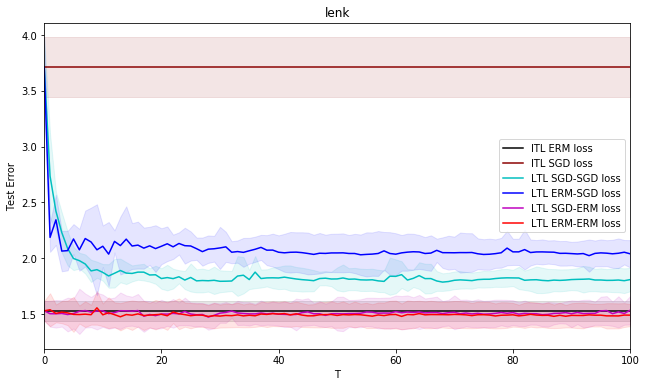

In [152]:
plot_resultsList(T+1, result_dict, y_label, title, save_dir, True, filename=exp+'ERMvsSGD-T'+str(x_right))